<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_BERT_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import regex
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
import re
import string
from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features, InputExample

In [2]:
# %run SheidaTalei_Preprocessing_FinalProject.ipynb
!pip install transformers

     |████████████████████████████████| 1.3MB 15.9MB/s 
     |████████████████████████████████| 2.9MB 53.4MB/s 
     |████████████████████████████████| 890kB 57.8MB/s 
     |████████████████████████████████| 1.1MB 56.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=ff8266238d52b97c879e5fe30958852c93034afd51cfe5d0d08a665004e0875b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [10]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [12]:
X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/Prepared_train_Data.csv')
Y_train= X_and_Y.Label
X_train = X_and_Y.text

In [13]:
X_and_Y_test = removeEmptyRows('/content/drive/MyDrive/Final/Prepared_test_Data.csv')
Y_test= X_and_Y_test.Label
X_test = X_and_Y_test.text

In [ ]:
#source:
#https://curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/
#https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
#https://sci2lab.github.io/ml_tutorial/bert_farsi_sentiment/

In [14]:
#We need to transform our data into a format BERT understands. 
# data is a dataFrame
def convert_data_into_input_example(data):
    """ Covert the list of examples into a list of `InputExample` objects that is suitable
        for BERT model."""
    input_examples = []
    for i in range(len(data)):
        example = InputExample(
            guid= None,
            text_a= data.iloc[i][ 'text'], #  is the text we want to classify
            text_b= None,
            label= data.iloc[i][ 'Label'] #is the label of our example, i.e. 1 or 0.
        )
        input_examples.append(example)
    return input_examples

In [15]:
train_input_examples = convert_data_into_input_example(X_and_Y)
val_input_examples = convert_data_into_input_example(X_and_Y_test)

In [16]:
train_input_examples[0]

InputExample(guid=None, text_a='بزنه نفس اجازه راحت بکشه قدم حال ناحق نمیدیم مجازات دختر میکنن دارن', text_b=None, label=0.0)

In [17]:

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

# text = 'I liked that book very much!'
# tokenized_text = tokenizer.tokenize(text)
# print(tokenized_text)
# text_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
# print('text ids:', text_ids)
# text_ids_with_special_tokens = tokenizer.build_inputs_with_special_tokens(text_ids)
# print('text ids with special tokens: ', text_ids_with_special_tokens)

In [18]:
#Tokenization
label_list = [0.0, 1.0]
MAX_SEQ_LENGTH = 128
bert_train_dataset = glue_convert_examples_to_features(examples=train_input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)
bert_val_dataset = glue_convert_examples_to_features(examples=val_input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)

# for i in range(3):
# #     print('Example: {}'.format(bert_train_dataset[i]))
#     print('Example: {')
#     print(' Input_ids: {}'.format(bert_train_dataset[i].input_ids))
#     print(' attention_mask: {}'.format(bert_train_dataset[i].attention_mask))
#     print(' token_type_ids: {}'.format(bert_train_dataset[i].token_type_ids))
#     print(' label: {}'.format(bert_train_dataset[i].label))
#     print('}')

/usr/local/lib/python3.6/dist-packages/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/usr/local/lib/python3.6/dist-packages/transformers/data/processors/glue.py:175: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


In [19]:
#for myself
ex = bert_train_dataset[0]
in_ids = ex.input_ids
decoded_sentence = tokenizer.decode(in_ids, skip_special_tokens=True)
print(decoded_sentence)

بزنه نفس اجازه راحت بکشه قدم حال ناحق نمیدیم مجازات دختر میکنن دارن


In [20]:
#Defining the Hyperparameters
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
# metrics_AUC = tf.keras.metrics.AUC(curve='ROC')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric_accuracy ])

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['dropout_37', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
#training the model
# model.fit(bert_train_dataset, validation_data=bert_val_dataset, epochs=3)
def my_solution(bdset):
    """ Create a list of input tensors required to be in the first argument of the
        model call function for training. e.g. `model([input_ids, attention_mask, token_type_ids])`.
    """
    input_ids, attention_mask, token_type_ids, label = [], [], [], []
    for in_ex in bdset:
        input_ids.append(in_ex.input_ids)
        attention_mask.append(in_ex.attention_mask)
        token_type_ids.append(in_ex.token_type_ids)
        label.append(in_ex.label)

    input_ids = np.vstack(input_ids)
    attention_mask = np.vstack(attention_mask)
    token_type_ids = np.vstack(token_type_ids)
    label = np.vstack(label)
    return ([input_ids, attention_mask, token_type_ids], label)
#Create a list of input tensors required to be in the first argument of the model call function for training. e.g.
# model([input_ids, attention_mask, token_type_ids]).

In [22]:
# Convert a training example into the Bert compatible format.
def example_to_features(input_ids, attention_masks, token_type_ids, y):
    """ Convert a training example into the Bert compatible format."""
    return {"input_ids": input_ids,
            "attention_mask": attention_masks,
            "token_type_ids": token_type_ids},y

In [24]:
x_train, y_train = my_solution(bert_train_dataset)
x_val, y_val = my_solution(bert_val_dataset)

print('x_train shape: {}'.format(x_train[0].shape))
print('x_val shape: {}'.format(x_val[0].shape))

train_ds = tf.data.Dataset.from_tensor_slices((x_train[0], x_train[1], x_train[2], y_train)).map(example_to_features).shuffle(100).batch(32)
val_ds   = tf.data.Dataset.from_tensor_slices((x_val[0], x_val[1], x_val[2], y_val)).map(example_to_features).batch(64)

print('Format of model input examples: {} '.format(train_ds.take(1)))

EPOCHS = 5

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

x_train shape: (30258, 128)
x_val shape: (7562, 128)
Format of model input examples: <TakeDataset shapes: ({input_ids: (None, 128), attention_mask: (None, 128), token_type_ids: (None, 128)}, (None, 1)), types: ({input_ids: tf.int64, attention_mask: tf.int64, token_type_ids: tf.int64}, tf.int64)> 
Epoch 1/5
946/946 [==============================] - 890s 941ms/step - loss: 0.5413 - accuracy: 0.7667 - val_loss: 0.5392 - val_accuracy: 0.7744
Epoch 2/5
946/946 [==============================] - 888s 939ms/step - loss: 0.5380 - accuracy: 0.7726 - val_loss: 0.5398 - val_accuracy: 0.7744
Epoch 3/5
946/946 [==============================] - 888s 938ms/step - loss: 0.5378 - accuracy: 0.7726 - val_loss: 0.5356 - val_accuracy: 0.7744
Epoch 4/5
946/946 [==============================] - 890s 941ms/step - loss: 0.5379 - accuracy: 0.7726 - val_loss: 0.5380 - val_accuracy: 0.7744
Epoch 5/5
946/946 [==============================] - 890s 941ms/step - loss: 0.5377 - accuracy: 0.7726 - val_loss: 0.5368 

In [25]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

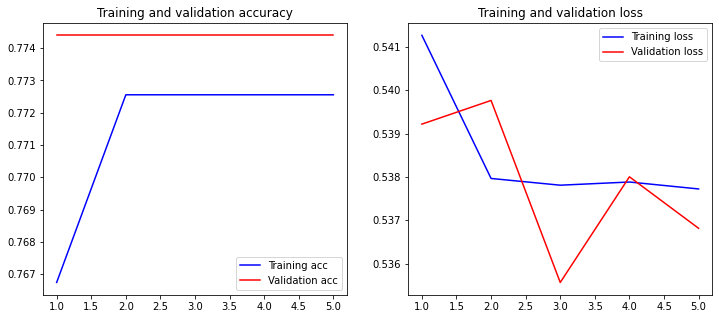

In [26]:
# model.fit(bert_train_dataset, validation_data=bert_val_dataset, epochs=3)
plot_history(history)

In [27]:
predictions = model.predict(val_ds)
print(predictions[0].shape)
print()
predictions_classes = np.argmax(predictions[0], axis = 1)
for i in range(10):
    print('text: {}\n, actual label: {}, predicted label: {}'.format(X_and_Y_test.iloc[i]['text'], val_input_examples[i].label, predictions_classes[i]))

(7562, 2)

text: خواهد کرد قطعا افتخار ک… خواهد بود پاسدار ایران زمانیست منطقه
, actual label: 0.0, predicted label: 0
text: ساعت طلا کاهش بازار قیمت ها سقوط مقایسه اتحادیه دیروز نیم ربع سکه ملی صراف می گویند منبع بورس جمع دقیقا دسته
, actual label: 1.0, predicted label: 0
text: همیشه شاه بخواید برایه نخواید برمیگرده 👑
, actual label: 0.0, predicted label: 0
text: مجانی دلار گم کمبود میلیارد ریاست اکنون دریافت نژاد بنزین دارو کند زمان ایران علاوه احمدی جمهوری صادرات ونزوئلا
, actual label: 1.0, predicted label: 0
text: کرونا ممد کاش رعایت مردن کرد#کن بخاطر بود#باش نفر ببینی تو
, actual label: 0.0, predicted label: 0
text: بین ریشه مانده کشور خروج امکان اسلامی… درون خرافات معتقدین
, actual label: 1.0, predicted label: 0
text: حمله میکنن مبارزه شاه طلباروسوزونده اصلاح دوچرخه حساب طلباگله واصلاح نایاکی برگشته رادیکال ازدیروزاوباش غلط ازادی جمله تافیهاخالدون بخاطرهمین ای اومده خانوم دخترطفلک سوار دارن ازدیروزبدجوری
, actual label: 0.0, predicted label: 0
text: ریختین دوچرخه تجاوز قرار بیرو

In [28]:
#Convert the test examples into Bert compatible format.
def example_to_features_predict(input_ids, attention_masks, token_type_ids):
    """
        Convert the test examples into Bert compatible format.
    """
    return {"input_ids": input_ids,
            "attention_mask": attention_masks,
            "token_type_ids": token_type_ids}


In [29]:

def get_prediction(in_sentences):
    """
        Prepare the test comments and return the predictions.
    """
    label_list = [0.0, 1.0]
    input_examples = [InputExample(guid="", text_a = x, text_b = None, label = 0.0) for x in in_sentences] # here, "" is just a dummy label
    predict_input_fn = glue_convert_examples_to_features(examples=input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)
    x_test_input, y_test_input = my_solution(predict_input_fn)
    test_ds   = tf.data.Dataset.from_tensor_slices((x_test_input[0], x_test_input[1], x_test_input[2])).map(example_to_features_predict).batch(32)

    predictions = model.predict(test_ds)
    #   print('predictions:', predictions[0].shape)
    predictions_classes = np.argmax(predictions[0], axis = 1)
    return [(sentence, prediction) for sentence, prediction in zip(in_sentences, predictions_classes)]

In [30]:
#Prepare the test comments and return the predictions

pred_sentences = []
i = 0
while(i<20):
  for tweet in X_and_Y_test.text:
    pred_sentences.append(tweet)
    i +=1
predictions = get_prediction(pred_sentences)
for p in predictions:
    print(p)

/usr/local/lib/python3.6/dist-packages/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/usr/local/lib/python3.6/dist-packages/transformers/data/processors/glue.py:175: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


Streaming output truncated to the last 5000 lines.
('نمایشگاه حقوق بشر خارجه وزارت نقض امریکا سخنران ایران', 0)
('محکوم سه سالگی بازداشت شده بود زن… روز اعدام زندان شنبه مهرماه سیاسی', 0)
('مرد زن ریش اراستگی چسه کرد#کن اصلاح مو اقایون فرمی… جالبتره حالا', 0)
('دفن ایا سرباز ترین روستا میدانستید پربازدید نقاط ازادی ایران محل', 0)
('مربوط ظریف باید معرف مسئولای براشون جناب کشور مهم چینیا تجار میزدن مسائل اینجا نمیکنید رسید#رس امریکا مشنگ موقع روابط بال سفیر دیگه', 0)
('نوبت نشه فردا کثافت منه کاشت#کار جلو کدو می تونست دختر', 0)
('دردناک اشتیاق ازادی بردگی نداشته باشد برده', 0)
('شباهت علی نژاد ای مسیح معصومه مرور کرد#کن تاریخچه مزدور صاد… زیاد معروف قم مجاهدین', 0)
('باور اعمالشون همزمان تک چرت بگیره طرف برسن کثافتا اسید سزا دست دختره بنزین خانواده کرد#کن شوکر 😐 اینقدر چقدر بره چاقو جر تو نمیتونم راست اخه چندتا خونه بتونه دل', 0)
('بچه ستاره رفیق به ماه قدیم غریب میرسونن😉😅👌💙 فکر کن مشهد یهو بود#باش یاد سلام بیاد زنگ بزنی', 0)
('دختره مدیر بیشرف تجاوز مرد', 0)
('بیشتر دلار بدونید شاه شهی

In [31]:
print("Evaluating the BERT model")
model.evaluate(val_ds)

Evaluating the BERT model
119/119 [==============================] - 67s 565ms/step - loss: 0.5368 - accuracy: 0.7744


[0.5368150472640991, 0.7743983268737793]